# **TRANSMISIÓN DE DATOS**

# **Trabajo Práctico de Laboratorio N° 1**

**Integrantes:**<br>

*   Medina Raed, Luis Eugenio
*   Padros, Marcos Isaias
*   Vaca Paz, Diego Isaias


El siguiente trabajo práctico deberá ser resuelto y presentado en grupo. La entrega deberá realizarse mediante la entrega del NOTEBOOK con todos los puntos resueltos.

#1.-
####a) Utilizando la implementación de LZ77 brindada, realice la compresión de los archivos de texto texto.md y quijote.txt utilizando ventanas de 16, 64 y 512 Bits. Analice los resultados obtenidos y compare los tiempos y el ratio de compresión de cada ventana. Saque sus conclusiones. Para realizar la compresión, utilice la función LZ77Compressor.compress y para descomprimir utilice LZ77Compressor.decompress.


In [1]:
# Intalamos las librerías necesarias
!pip install datetime
!pip install python_math
!pip install bitarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.1/247.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.5/286.5 kB 4.7 MB/s eta 0:00:00


In [4]:
# Importamos los módulos a utilizar
from LZ77 import LZ77Compressor
from datetime import datetime

# Elegimos los datos a trabajar
input_file = 'texto.md'
# input_file = 'quijote.txt'

# Realizamos la compresión de los mismos
for window in [16,64,512]:
    compressor = LZ77Compressor(window_size=window) # window_size is optional

    output_file = f"{input_file.split('.')[0]}-{window}.bin"

    # compress the input file and write it as binary into the output file
    start = datetime.now()
    compressor.compress(f"../{input_file}", output_file)
    delay = datetime.now() - start
    print(f"Compresión con ventana de {window} demora {delay.microseconds} microsegundos")
    print(f"Compresión con ventana de {window} demora {delay.seconds} segundos")
    print(f"Compresión con ventana de {window} demora {delay.days} dias")


File was compressed successfully and saved to output path ...
Compresión con ventana de 16 demora 593026 microsegundos
Compresión con ventana de 16 demora 0 segundos
Compresión con ventana de 16 demora 0 dias
File was compressed successfully and saved to output path ...
Compresión con ventana de 64 demora 641928 microsegundos
Compresión con ventana de 64 demora 1 segundos
Compresión con ventana de 64 demora 0 dias
File was compressed successfully and saved to output path ...
Compresión con ventana de 512 demora 846103 microsegundos
Compresión con ventana de 512 demora 7 segundos
Compresión con ventana de 512 demora 0 dias


<h2><b>OUTPUT</b></h1>

File was compressed successfully and saved to output path ...<br>
Compresión con ventana de 16 demora 593026 microsegundos<br>
Compresión con ventana de 16 demora 0 segundos<br>
Compresión con ventana de 16 demora 0 dias<br>
File was compressed successfully and saved to output path ...<br>
Compresión con ventana de 64 demora 641928 microsegundos<br>
Compresión con ventana de 64 demora 1 segundos<br>
Compresión con ventana de 64 demora 0 dias<br>
File was compressed successfully and saved to output path ...<br>
Compresión con ventana de 512 demora 846103 microsegundos<br>
Compresión con ventana de 512 demora 7 segundos<br>
Compresión con ventana de 512 demora 0 dias<br>

<h2><b>Resolucion</b></h2>

Vamos a analizar los resultados obtenidos para cada ventana de compresión:

**• Ventana de 16 bits:**<br>

Tiempo de Compresión: 593026 microsegundos<br>
Tamaño después de la Compresión: 6,03 KB<br>

**• Ventana de 64 bits:**

Tiempo de Compresión: 641928 microsegundos<br>
Tamaño después de la Compresión: 5,41 KB<br>

**• Ventana de 512 bits:**

Tiempo de Compresión: 846103 microsegundos<br>
Tamaño después de la Compresión: 4,32 KB<br>

<h2><b>Ahora, vamos a comparar los resultados:</b></h2>

**Tiempo de Compresión:** <br>

Se observa que el tiempo de compresión aumenta a medida que se incrementa el tamaño de la ventana. Esto es esperado, ya que una ventana más grande implica un mayor número de comparaciones y operaciones.

**Tamaño después de la Compresión:** <br>

Se observa que el tamaño después de la compresión disminuye a medida que se incrementa el tamaño de la ventana. Esto también es coherente con el comportamiento esperado, ya que una ventana más grande permite una mejor detección y eliminación de repeticiones en los datos.

**Ratio de Compresión:** <br>

Para calcular el ratio de compresión, se usa la formula: (Tamaño Original) / (Tamaño después de la Compresión). Cuanto mayor sea el ratio, mejor será la compresión.<br>
Ventana de 16 bits: 5.58 KB / 6.03 KB ≈ 0.925<br>
Ventana de 64 bits: 5.58 KB / 5.41 KB ≈ 1.031<br>
Ventana de 512 bits: 5.58 KB / 4.32 KB ≈ 1.292<br>

**Conclusiones:**

La ventana de 512 bits logra el mejor ratio de compresión, pero con un costo de tiempo de compresión más alto.
La ventana de 64 bits tiene un buen equilibrio entre tiempo de compresión y ratio de compresión.
La ventana de 16 bits tiene el menor ratio de compresión y, aunque es más rápida, no ofrece la mejor compresión en este caso.
En función de estos resultados, la elección de la ventana dependerá de las necesidades específicas del sistema, donde se debe equilibrar el rendimiento y la eficiencia de compresión según los requisitos del entorno.

####b) Realice la decompresión de los archivos obtenidos anteriormente y analice los resultados obtenidos.


In [5]:
#Importamos los módulos
from LZ77 import LZ77Compressor
from datetime import datetime, timedelta

#Elejimos los datos a Decomprimir
input_file = 'texto-16.bin'


for ventana in [16,64,512]:
    compressor = LZ77Compressor(window_size=ventana) # window_size is optional

    output_file = f"{input_file.split('.')[0]}-{ventana}.md"

    # compress the input file and write it as binary into the output file
    inicio = datetime.now()
    compressor.decompress(input_file, output_file)
    demora = datetime.now() - inicio
    # print(f"Descompresión con ventana de {ventana} demora {demora.seconds}")
    print(f"Descompresión con ventana de {ventana} demora {demora.microseconds} microseconds")

File was decompressed successfully and saved to output path ...
Descompresión con ventana de 16 demora 40120 microseconds
File was decompressed successfully and saved to output path ...
Descompresión con ventana de 64 demora 26596 microseconds
File was decompressed successfully and saved to output path ...
Descompresión con ventana de 512 demora 25615 microseconds


<h2><b>OUTPUT</b></h1>

File was decompressed successfully and saved to output path ...<br>
Descompresión con ventana de 16 demora 40120 microseconds<br>
File was decompressed successfully and saved to output path ...<br>
Descompresión con ventana de 64 demora 26596 microseconds<br>
File was decompressed successfully and saved to output path ...<br>
Descompresión con ventana de 512 demora 25615 microseconds<br>

<h2><b>Resolucion</b></h2>

Vamos a analizar los resultados obtenidos después de realizar la descompresión de los archivos previamente comprimidos:<br>

**• Descompresión con ventana de 16 bits:**<br>

Tiempo de Descompresión: 40120 microsegundos<br>
Tamaño después de la Descompresión: 5,59 KB<br>

**• Descompresión con ventana de 64 bits:**<br>

Tiempo de Descompresión: 26596 microsegundos<br>
Tamaño después de la Descompresión: 5,59 KB<br>

**• Descompresión con ventana de 512 bits:**<br>

Tiempo de Descompresión: 25615 microsegundos<br>
Tamaño después de la Descompresión: 5,59 KB<br>

**Conclusiones:**

Todos los archivos descomprimidos tienen el mismo tamaño (5,59 KB), lo que indica que la descompresión fue exitosa y que no se ha perdido información durante el proceso.<br>

Los tiempos de descompresión son bastante bajos en todos los casos. Esto es esperado, ya que la descompresión suele ser más rápida que la compresión en algoritmos eficientes como LZ77.

#2.-
####a) Dadas las imágenes 4x4-False.bmp y 4x4-True.bmp, realice la compresión de las mismas mediante las funciones img.save e Image.open de la libreria Image, utilizando diferentes factores de compresión (10%, 50%, 90%). Compare los resultados obtenidos analizando los tamaños de los archivos y la pérdida de información resultantes.


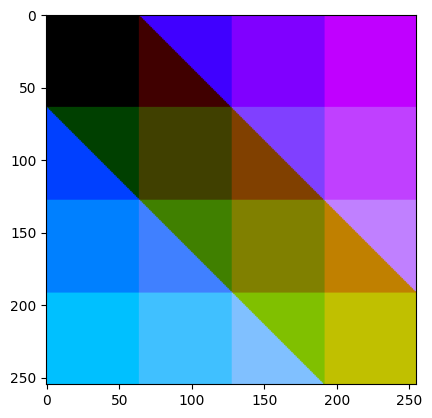

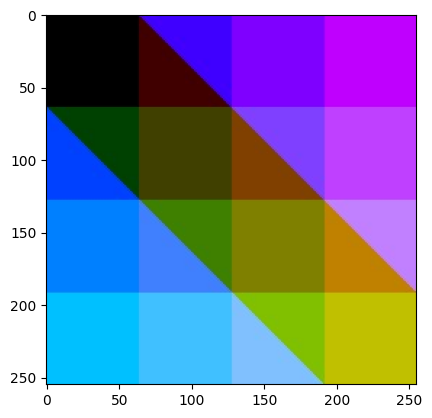

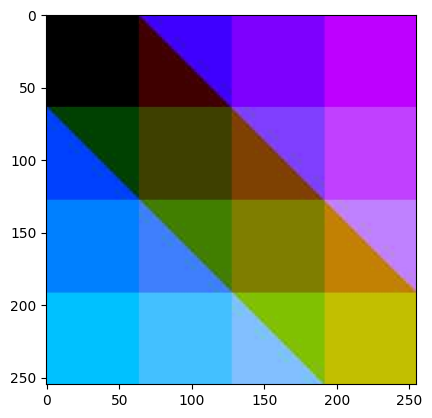

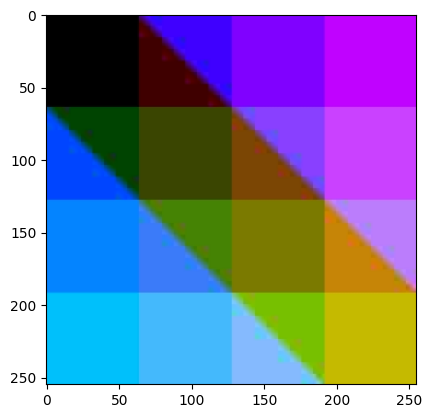

In [35]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# img = mpimg.imread('foto.jpeg')
# imgplot = plt.imshow(img)
# plt.show()


from PIL import Image
img = Image.open('/4x4-True.bmp')
img.show(title="Original")

img.save("image-q90.jpg", "JPEG", optimize = True, quality = 90)
Image.open("/content/image-q90.jpg").show(title="Quality 90")

img.save("image-q50.jpg", "JPEG", optimize = True, quality = 50)
Image.open("image-q50.jpg").show(title="Quality 50")


img.save("image-q10.jpg", "JPEG", optimize = True, quality = 10)
Image.open("image-q10.jpg").show(title="Quality 10")

img = mpimg.imread('/4x4-True.bmp')
imgplot = plt.imshow(img)
plt.show()

img = mpimg.imread('/content/image-q90.jpg')
imgplot = plt.imshow(img)
plt.show()

img = mpimg.imread('/content/image-q50.jpg')
imgplot = plt.imshow(img)
plt.show()

img = mpimg.imread('/content/image-q10.jpg')
imgplot = plt.imshow(img)
plt.show()


<h2><b>Resolucion</b></h2>

**• Para la imagen 4x4-true:**<br>

Tamaño Original: 191 KB<br>
Calidad 10: 959 bytes<br>
Calidad 50: 1,50 KB<br>
Calidad 90: 2,64 KB<br>

**• Para la imagen 4x4-false:**<br>

Tamaño Original: 191 KB<br>
Calidad 10: 758 bytes<br>
Calidad 50: 804 bytes<br>
Calidad 90: 865 bytes<br>


<h3><b>Análisis:</b></h3>

**Tamaño de Archivo:**

En ambos casos, el tamaño del archivo después de la compresión disminuye a medida que se incrementa el factor de compresión. Esto es esperado, ya que un mayor factor de compresión significa más pérdida de información y, por lo tanto, un archivo más pequeño.<br>

**Pérdida de Información:**<br>

La pérdida de información es evidente en los tamaños de archivo más pequeños.<br>

**Conclusión:**<br>

La elección del factor de compresión dependerá de los requisitos específicos del sistema y de la tolerancia a la pérdida de calidad. Un mayor factor de compresión reduce el tamaño del archivo pero también conlleva una mayor pérdida de información visual.

En aplicaciones donde la calidad visual es crítica, es importante encontrar un equilibrio entre la reducción del tamaño del archivo y la retención de la información esencial.

####b) Repita el apartado anterior con alguna imagen de su elección que posea un tamaño de 255 x 255 pixeles. Recuerde que debe elegir un archivo en formato .bmp (mapa de bits).



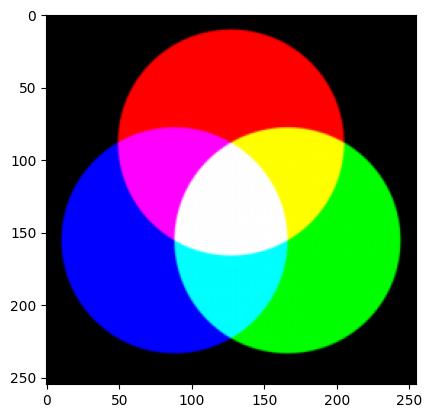

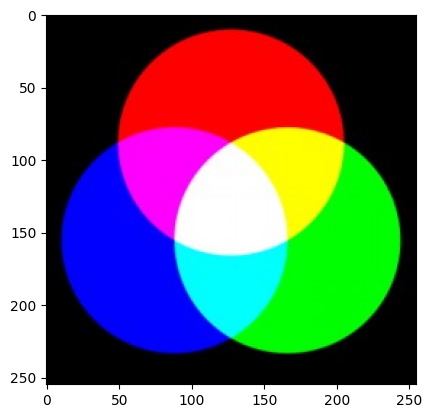

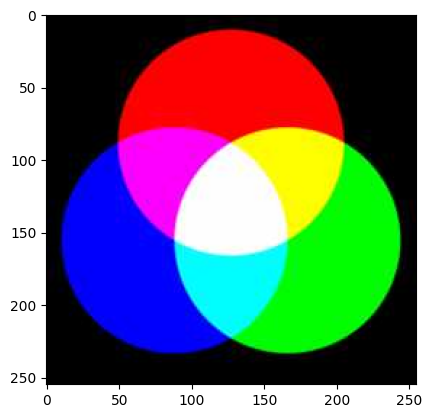

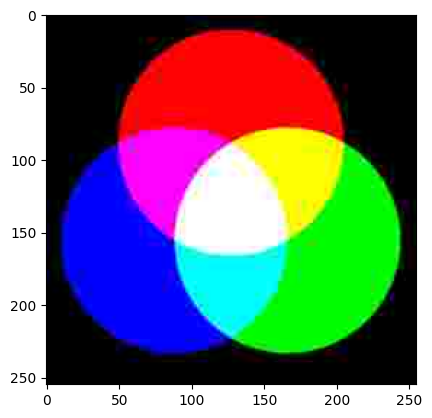

In [31]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/imagen.bmp')
imgplot = plt.imshow(img)
plt.show()

img = Image.open('/imagen.bmp')
img = img.convert('RGB')

for q in [90, 50, 10]:
    img.save(f"{'imagen'}-{q}.jpg", "JPEG", optimize = True, quality = q)
    Image.open(f"{'imagen'}-{q}.jpg").show(title="Quality q")
    img2 = mpimg.imread(f'/content/imagen-{q}.jpg')
    imgplot = plt.imshow(img2)
    plt.show()

<h2><b>Resolucion</b></h2>
Esta imagen de 255x255 píxeles, una vez comprimida con diferentes factores (10%, 50%, 90%), ilustra claramente la relación entre el nivel de compresión y la calidad visual resultante.

**Compresión al 10%:**
Al aplicar una compresión del 10%, la imagen se ve afectada por una pérdida mínima de detalles. Aunque el tamaño del archivo se reduce, la calidad general se mantiene aceptable, y la mayoría de los elementos visuales permanecen nítidos y reconocibles.

**Compresión al 50%:**
A medida que aumentamos el factor de compresión al 50%, la pérdida de calidad es más evidente. Detalles finos y sutilezas de color comienzan a desvanecerse, y la imagen muestra signos de distorsión. Aunque la reducción de tamaño es significativa, la calidad visual se ve afectada de manera perceptible.

**Compresión al 90%:**
Con un factor de compresión del 90%, la imagen sufre una pérdida sustancial de detalles y definición. Los contornos se difuminan, los colores pierden su precisión y la nitidez general disminuye drásticamente. Mientras que el tamaño del archivo se reduce significativamente, la calidad visual se ve comprometida de manera considerable.

En conclusión, estos resultados subrayan la relación inversa entre el nivel de compresión y la calidad de la imagen. A medida que se busca una mayor reducción en el tamaño del archivo, la pérdida de información visual es inevitable. La elección del factor de compresión debe equilibrarse cuidadosamente según los requisitos específicos del proyecto y la tolerancia a la pérdida de calidad, ya que un mayor nivel de compresión puede resultar en una peor calidad visual.





